# Stochastic Gradient Method

## Linear Reression Problem
데이터$(x_i,y_i)$ for $i=1,2,\cdots, N$가 주어져 있을 때, 다음 문제를 푸시오.
\begin{equation}
\min_w loss(w,x,y)
\end{equation}
where
\begin{equation}
loss(w,x,y) = \frac{1}{N}\sum_{i=1}^N |w_0x_i + w_1 - y_i|^2
\end{equation}

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
N = 100
f = lambda x: 0.3 * x + 5.0 # Target function
x_train = np.linspace(-1, 1, N)
np.random.seed(313)
y_train = f(x_train) + 0.2 * np.random.rand(len(x_train))

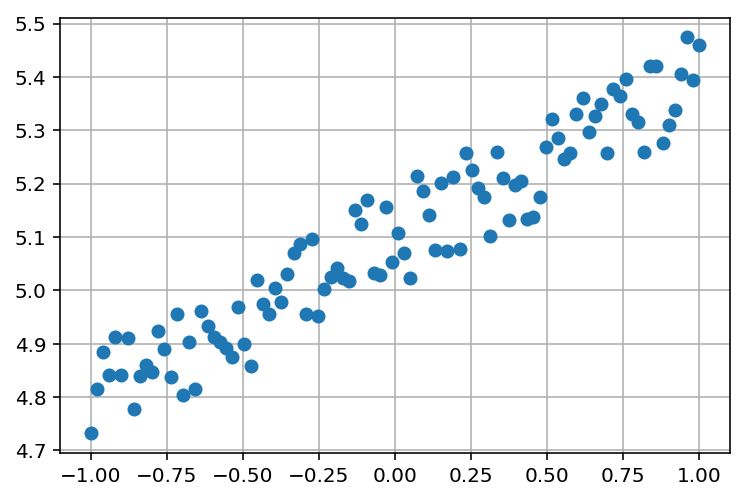

In [3]:
plt.plot(x_train,y_train, 'o')
plt.grid()
plt.show()

## 리뷰 Gradient Descent Method
현재까지 배운 수치최적화 방법은 아래와 같이 3가지가 있습니다.
1. Gradient Descent Method(=Steepest Descent Method)
1. Newton Method
1. BFGS Method : Quasi-Newton(Hessian 계산을 하지 않습니다.)

Newton method와 BFGS method는 convex문제에서 굉장히 빠른 장점을 갖고 있지만, 안정성이 Gradient Descent에 비해서 낮습니다. 실무에서는 머신러닝/딥러닝을 고려하기때문에 안정성이 더 높은 Gradient Descent를 자주 사용합니다.

### Gradient Descent
1. loss function을 정의힌다.
1. gradient function을 정의힌다.
1. Parameter를 Tunning한다.

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0x_i + w_1 - y_i|^2
\end{equation}
\begin{equation}
\nabla loss(w) = \frac{2}{N}\sum_{i=1}^N (w_0x_i + w_1 - y_i)
\begin{bmatrix}
x_i\\1\\
\end{bmatrix}
\end{equation}

In [4]:
def loss(w, x_list, y_list):
    N = len(x_list)
    val = 0.0
    for i in range(N):
        val += (w[0] * x_list[i] + w[1] - y_list[i])**2 / N
    return val

In [5]:
def grad_loss(w, x_list, y_list):
    dim = len(w)
    N = len(x_list)
    val = np.array([0.0, 0.0])
    for i in range(N):
        er = w[0] * x_list[i] + w[1] - y_list[i]
        val += 2.0 * er * np.array([x_list[i], 1.0]) / N
    return val

In [6]:
W0 = np.linspace(-10, 10, 101)
W1 = np.linspace(-10, 10, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

In [7]:
from helper import gradient_descent
w0 = np.array([-5.0, -5.0])
w_gd, path_gd = gradient_descent(grad_loss, x_train, y_train, w0, learning_rate=0.1, MaxIter=500)
print(w_gd, loss(w_gd, x_train, y_train))
paths = path_gd
paths = np.array(np.matrix(paths).T)

[0.30190479 5.10199044] 0.003137935483633195


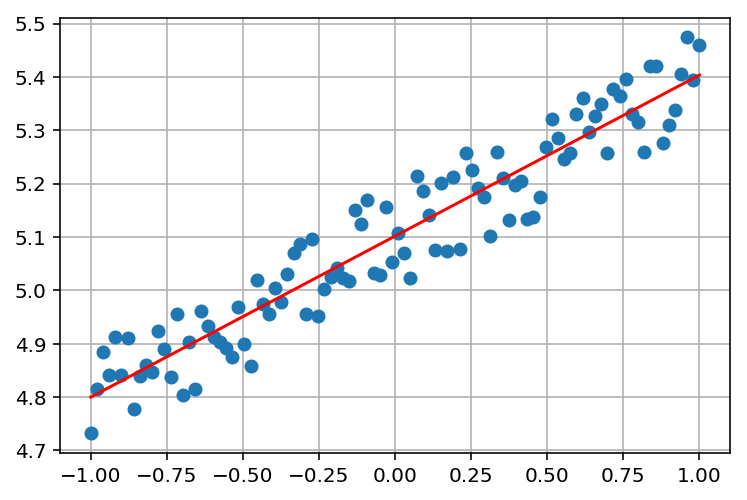

In [8]:
y_pred = w_gd[0] * x_train + w_gd[1]
plt.plot(x_train,y_train, 'o')
plt.plot(x_train, y_pred, '-r')
plt.grid()
plt.show()

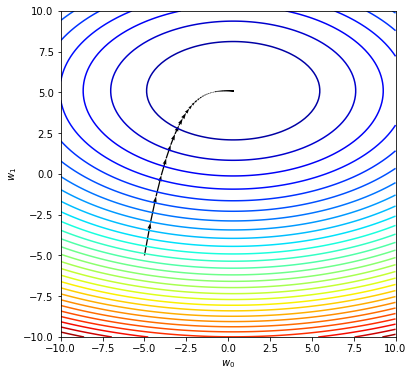

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),30))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

## Mini-Batch
머신러닝/딥러닝에서는 데이터가 매우 많습니다. 이런 경우에는 `loss()`을 계산시 2가지 문제가 발생합니다.
1. 데이터로드 할 메모리가 부족
1. 계산 시간 오래 걸림

그래서, 데이터를 나눠서 계산하는 방법을 선택합니다. 이번 섹션에서는 `generate_batches()`를 사용하여 큰 data를 나누어 mini-batch들로 만드는 함수를 소개합니다.

In [11]:
from helper import generate_batches

In [12]:
out_batches = generate_batches(15, x_train, y_train)
for x_batch, y_batch in out_batches:
    print(x_batch)
    print(y_batch)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172]
[4.73310792 4.81608148 4.88429557 4.84176856 4.9134917  4.84247462
 4.91028113 4.77690434 4.83892825 4.85977199 4.84787289 4.92326249
 4.89114891 4.83867882 4.9551307 ]
[-0.6969697  -0.67676768 -0.65656566 -0.63636364 -0.61616162 -0.5959596
 -0.57575758 -0.55555556 -0.53535354 -0.51515152 -0.49494949 -0.47474747
 -0.45454545 -0.43434343 -0.41414141]
[4.80401813 4.90275366 4.81507069 4.96167385 4.93289204 4.91280509
 4.90421051 4.892103   4.87536297 4.96892072 4.89941037 4.8576179
 5.02007309 4.97482565 4.95671788]
[-0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111]
[5.00423371 4.97813356 5.03082895 5.07081232 5.08674246 4.95639729
 5.09665032 4.95232692 5.00203048 5.02505695 5

## Stochastic Gradient Method의 핵심 아이디어
1. `x_train`와 `y_train`이 너무 많아서 계산이 오래 걸린다. 혹은 메모리가 부족하다.
1. `x_train`와 `y_train`의 일부만으로 gradient 계산하자.
1. RANDOM 하게 섞으면 일부분만으로도 충분히 gradient를 잘 추정할 수 있을 것이다.

__STOCHASTIC = RANDOM__

## Stochastic Gradient Method의 장/단점
- 장점
    1. 메모리를 아낄 수 있다.
    1. 계산이 빠르다.
    1. Local Minimum에서 벗어 날 가능성이 있다.
- 단점
    1. Gradient 값이 정확하지 않다.
    1. 그래서 수렴속도가 느리다.

### 실습 포인트
1. `np.random.suffle()`을 사용하여 `x_train`과 `y_train`을 섞습니다.
    - Hint 1
```python
shuffled_id = np.arange(0, N)
np.random.shuffle(shuffled_id)
```
    - Hint 2
```python
ids = np.arange(0,4)
print(ids)
np.random.shuffle(ids)
print(ids)
```
```
ids = [0, 1, 2, 3]
ids = [2, 0, 3, 1]
```
    - Hint 3
```python
x = np.array([10, 20, 30, 40])
ids = np.array([2, 0, 3, 1])
print(x[ids])
```
```
x = [30, 10, 40, 20]
```
1. `generate_batches()`를 사용하여 여러개의 batch로 나눕니다. : `batch_size = 5`
```python
for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
```
1. 각 나눈 batch 들로 Gradient를 계산하고
```python
grad = grad_loss(w0, x_batch, y_batch)
```
1. Gradient Decent Method를 적용
```python
w1 = w0 - learning_rate * grad
```

In [20]:
N = 100
f = lambda x: 0.3 * x + 5.0 # Target function
x_train = np.linspace(-1, 1, N)
np.random.seed(313)
y_train = f(x_train) + 0.2 * np.random.rand(len(x_train))

In [21]:
shuffled_id = np.arange(0, N)

In [22]:
np.random.shuffle(shuffled_id)

In [25]:
x_train = x_train[shuffled_id]

In [26]:
x_train

array([ 0.61616162, -0.75757576,  0.71717172, -0.63636364, -0.35353535,
       -0.09090909, -0.61616162, -0.57575758, -0.97979798,  0.97979798,
        0.25252525,  0.01010101, -0.45454545, -0.5959596 , -0.17171717,
       -0.15151515,  0.35353535, -0.65656566, -0.01010101,  0.47474747,
        0.67676768,  0.29292929,  0.09090909, -0.83838384, -0.81818182,
       -0.43434343,  0.07070707, -0.91919192,  0.8989899 , -0.07070707,
        0.49494949, -0.27272727, -0.71717172, -0.39393939, -0.6969697 ,
        0.33333333, -0.67676768,  0.85858586, -0.03030303, -0.11111111,
        0.11111111,  0.05050505,  0.21212121, -0.85858586,  0.17171717,
        0.95959596,  0.87878788, -0.77777778,  0.37373737,  0.51515152,
        0.15151515,  0.81818182,  0.27272727,  0.39393939, -0.41414141,
       -0.21212121, -0.7979798 , -0.51515152,  0.93939394,  0.83838384,
       -0.49494949,  0.91919192, -0.93939394, -0.55555556,  0.41414141,
        0.75757576, -0.13131313, -0.33333333,  0.77777778,  1.  

In [31]:
batch_size = 10
path_sgd = []
w0 = np.array([-5.0, -5.0])
path_sgd.append(w0)
learning_rate = 0.1
MaxIter = 100

In [32]:
for i in range(MaxIter):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):#TODO2
        
        grad = grad_loss(w0, x_batch, y_batch)#TODO3
        w1 = w0 - learning_rate * grad
        w0 = w1
        path_sgd.append(w1)

In [34]:
batch_size = 10
path_sgd = []
w0 = np.array([-5.0, -5.0])
path_sgd.append(w0)
learning_rate = 0.1
MaxIter = 100

shuffled_id = np.arange(0, N)
np.random.shuffle(shuffled_id)

x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]



for i in range(MaxIter):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):#TODO2
        
        grad = grad_loss(w0, x_batch, y_batch)#TODO3
        w1 = w0 - learning_rate * grad
        w0 = w1
        path_sgd.append(w1)

## 구현 후 아래 코드를 실행하면 
다음과 같은 그림을 얻게 됩니다.
![SGD.png](SGD.png)

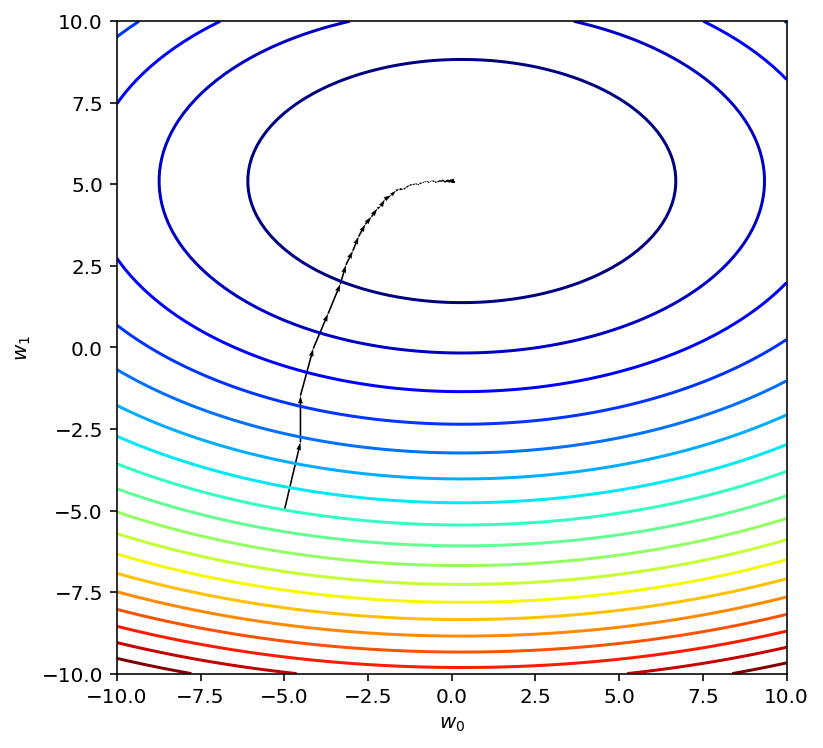

In [35]:
paths = path_sgd
paths = np.array(np.matrix(paths).T)

fig, ax = plt.subplots(figsize=(6, 6))

ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()),20))
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
plt.show()

In [36]:
cost_history_sgd = [loss(item, x_train, y_train) for item in path_sgd]

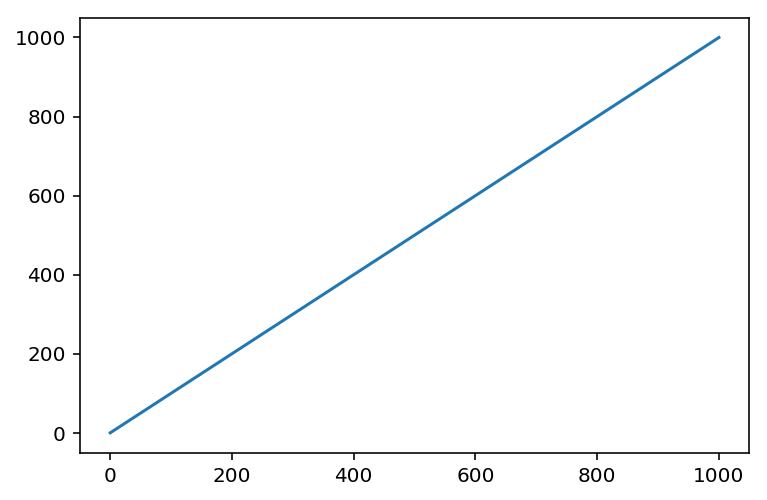

In [37]:
plt.plot(np.arange(0, len(cost_history_sgd)))

### 비교
![GD.png](GD.png)
![SGD.png](SGD.png)